In [3]:
library(Seurat)
library(scRNAtoolVis)
library(RColorBrewer)
library(ggrepel)
library(MySeuratWrappers)

Attaching SeuratObject



Loading required package: tidyverse

Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”
Loading required package: reticulate


Attaching package: ‘MySeuratWrappers’


The followin

In [2]:
# load data
pbmc = readRDS("/home/suyanchi/project/dab/results/case/rds/PBMC.dr.rds")
pbmc

An object of class Seurat 
19845 features across 36030 samples within 2 assays 
Active assay: RNA (17845 features, 2000 variable features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne

In [3]:
allcolour = colorRampPalette(c(
    "#FED439E5", "#709AE1E5", "#8A9197E5", "#D2AF81E5", "#FD7446E5", "#D5E4A2E5", "#197EC0E5", "#F05C3BE5", "#46732EE5",
    "#71D0F5E5", "#370335E5", "#075149E5", "#C80813E5", "#91331FE5", "#1A9993E5", "#FD8CC1E5"
))(30)
allcolour

[1] "#FED439" "#B4B68F" "#7099DE" "#7E95B8" "#8E9395" "#B4A28A" "#D6A87A"
 [8] "#EC8A5C" "#F78352" "#E2BD82" "#B4D2A7" "#539DB6" "#4576A4" "#B4655F"
[15] "#C66137" "#6F6D31" "#518C64" "#68BCCB" "#5E90B9" "#412656" "#261D3B"
[22] "#0D4646" "#503534" "#B40F18" "#B11917" "#94301E" "#5B6052" "#1E958E"
[29] "#8792A9" "#FD8CC1"

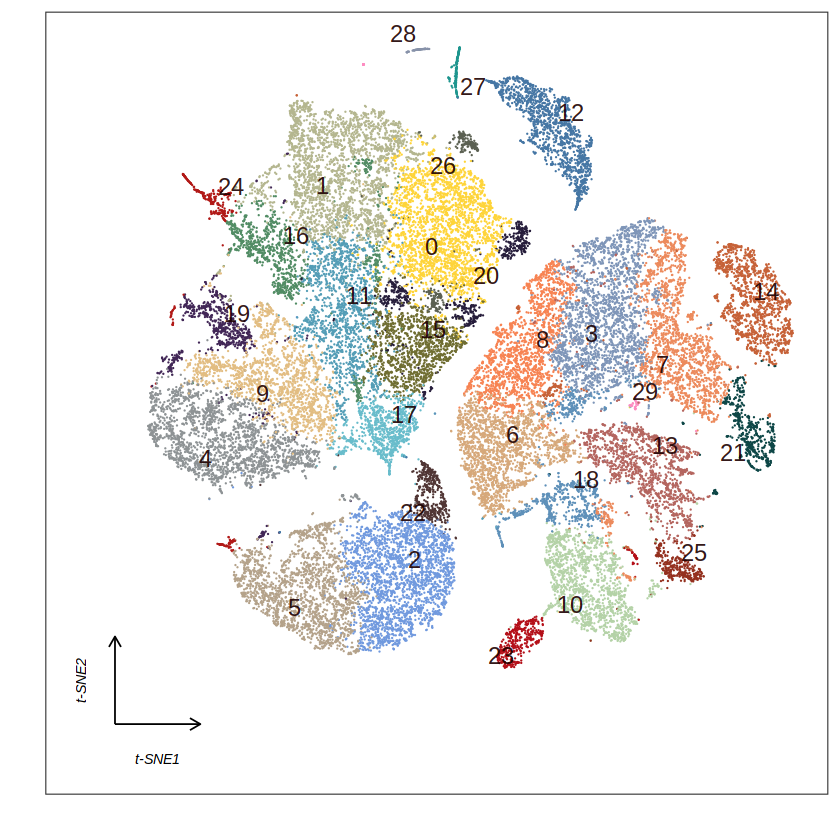

In [4]:
# tsne

p = clusterCornerAxes(
    object = pbmc, reduction = "tsne", cellLabel = T, pSize = 0.01,cellLabelSize=5,cellLabelColor = '#1d0101e5',
    noSplit = T, arrowType = "open", themebg = "bwCorner",show.legend = FALSE
) +
    scale_color_manual(values = allcolour)
p

In [42]:
ggsave(plot=p, filename='/home/suyanchi/project/dab/results/case/figures/tsne_bis.pdf', height=5, width=5)

In [43]:
raw = readRDS("/home/suyanchi/project/scHNSCC-main/HNSCC/rds/CD45pPBMC.integrated.dr.rds")
raw

An object of class Seurat 
19845 features across 36030 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

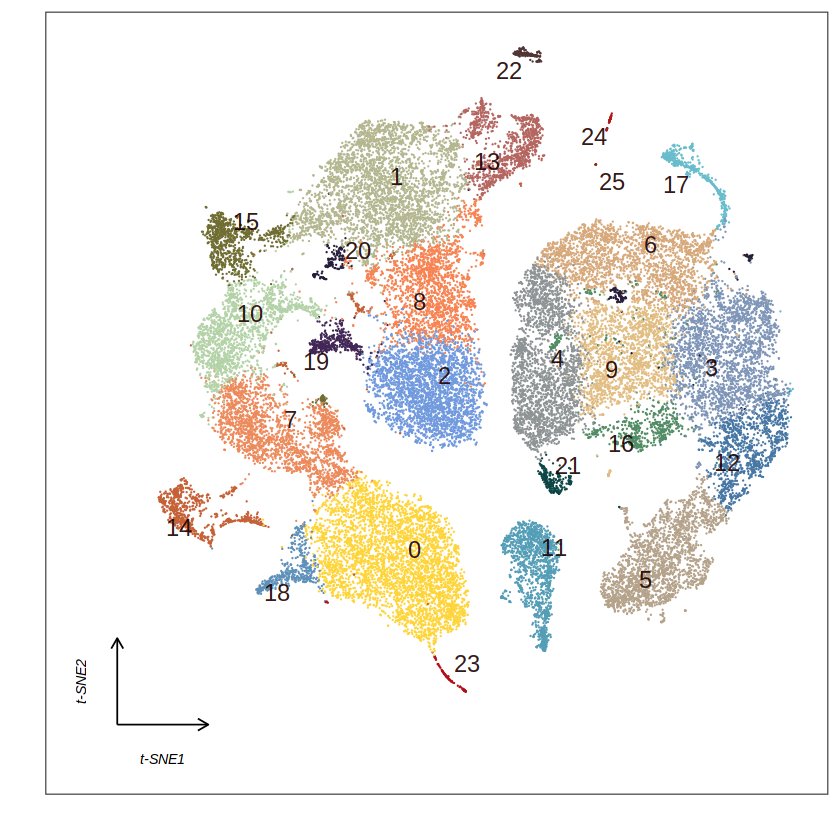

In [44]:
# tsne

p = clusterCornerAxes(
    object = raw, reduction = "tsne", cellLabel = T, pSize = 0.01,cellLabelSize=5,cellLabelColor = '#1d0101e5',
    noSplit = T, arrowType = "open", themebg = "bwCorner",show.legend = FALSE
) +
    scale_color_manual(values = allcolour)
p

In [45]:
ggsave(plot=p, filename='/home/suyanchi/project/dab/results/case/figures/tsne_raw.pdf', height=5, width=5)

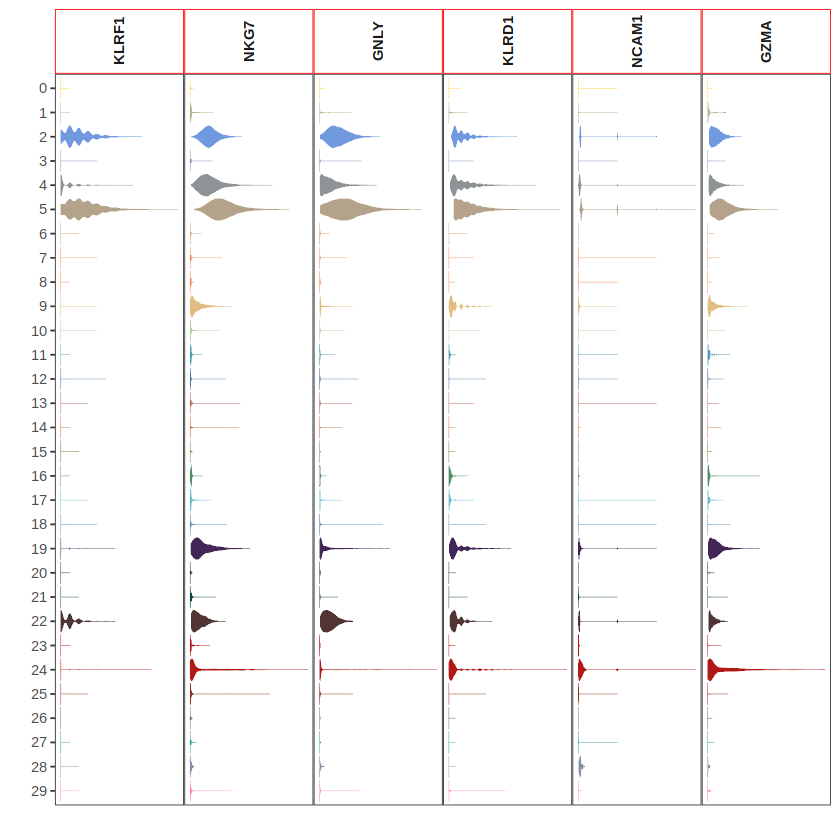

In [5]:
DefaultAssay(pbmc) <- "RNA"
p.nk <- VlnPlot(pbmc,features = c("KLRF1","NKG7","GNLY","KLRD1","NCAM1","GZMA"),stacked = T, pt.size = 0,cols=allcolour,
                direction = "horizontal",combine = T, x.lab = '', y.lab = '') +
  theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
p.nk

In [48]:
ggsave("/home/suyanchi/project/dab/results/case/figures/violin.nk.markers.pdf",p.nk,width = 6,height = 10)

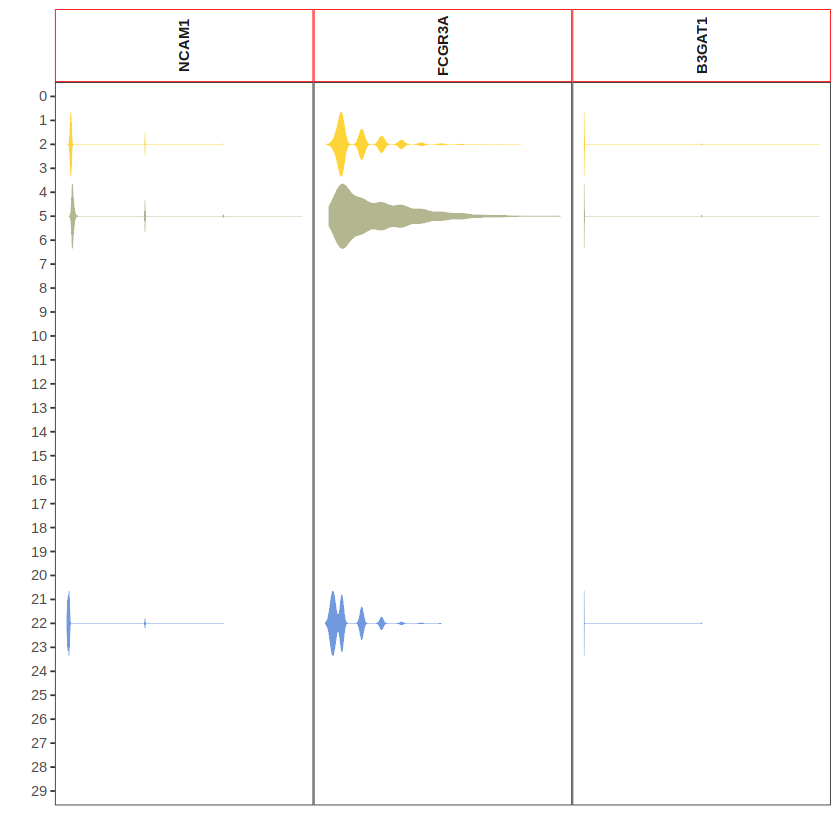

In [6]:
p.nk.sub <- VlnPlot(pbmc, features = c("NCAM1","FCGR3A","B3GAT1"),
                    cols = allcolour, idents=c(2,5,22),
                    pt.size = 0,direction = "horizontal",stacked = T,combine = T,x.lab = '', y.lab = '') +
  theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
p.nk.sub

In [29]:
marker0 = FindMarkers(pbmc, ident.1=2, ident.2=c(5,22), only.pos=T)
marker1 = FindMarkers(pbmc, ident.1=5, ident.2=c(2,22), only.pos=T)
marker2 = FindMarkers(pbmc, ident.1=22, ident.2=c(5,2), only.pos=T)
head(marker0)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
XCL1,1.070999e-236,1.0687398,0.966,0.845,1.911197e-232
ZNF524,3.024249e-207,0.9735814,0.895,0.829,5.396772e-203
MAP3K2,2.443420e-190,0.4468211,1.000,1.000,4.360283e-186
THYN1,2.180825e-189,0.3380415,1.000,0.986,3.891681e-185
MBD4,5.158041e-188,0.3132732,1.000,1.000,9.204525e-184
CCL4L2,1.449360e-173,7.7442775,1.000,1.000,2.586384e-169


In [30]:
allmarkergene = union(union(rownames(marker0), rownames(marker1)),rownames(marker2))
length(allmarkergene)

[1] 1912

In [54]:
pbmc.nk = subset(pbmc, idents=c(2,5,22))
pbmc.nk$seurat_clusters = factor(pbmc.nk$seurat_clusters, levels=c(0,1,2))
mat <- GetAssayData(pbmc.nk, assay = "RNA", slot = "scale.data")
curr.ids <- c(0:2)
new.ids <- c("Bl1","Bl2","Bl3")
pbmc.nk$classI <- plyr::mapvalues(pbmc.nk$seurat_clusters, from = curr.ids, to = new.ids)

mat[mat > 2] = 2
mat[mat < -2] = -2
cls.info <- sort(pbmc.nk$classI)
mat <- as.matrix(mat[intersect(allmarkergene, rownames(mat)), names(cls.info)])
gene <- c("HBA1","IL7R","PTGDS","KIR2DL3","RAMP1","MYOM2","HBA1")
gene <- unique(gene)
gene.pos <- which(rownames(mat) %in% gene)
row.anno <- ComplexHeatmap::rowAnnotation(gene = ComplexHeatmap::anno_mark(at = gene.pos, labels = rownames(mat)[which(rownames(mat) %in% gene)]))
cols <- c("#4E9BD3","#DB4840","#DF78C1")
names(cols) <- levels(cls.info)
top.anno <- ComplexHeatmap::HeatmapAnnotation(
  cluster = ComplexHeatmap::anno_block(gp = grid::gpar(fill=cols), labels = levels(cls.info), labels_gp = grid::gpar(cex=0.5,col='white'))
)
col.fun <- circlize::colorRamp2(seq(min(mat),max(mat),length=3), c('#377EB8','white','#E41A1C'))

In [55]:
pdf("/home/suyanchi/project/dab/results/case/figures/diff.cls.heatmap.pdf",width = 10,height = 10)
ComplexHeatmap::Heatmap(matrix = mat, cluster_rows = F, cluster_columns = F,
                        show_column_names = F, show_row_names = F,
                        column_split = cls.info, right_annotation = row.anno,
                        #column_title = NULL, top_annotation = top.anno,
                        heatmap_legend_param = list(title = 'Expression', title_position = 'leftcenter-rot'),col = col.fun)
dev.off()

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

In [ ]:
mat <- GetAssayData(pbmc, assay = "RNA", slot = "scale.data")
mat[mat > 2] = 2
mat[mat < -2] = -2
cls.info <- sort(CD45pPBMC.NK$classI)
mat <- as.matrix(mat[all.markers$gene, names(cls.info)])

gene <- c("HBA1","IL7R","PTGDS","KIR2DL3","RAMP1","MYOM2","HBA1"
)
gene <- unique(gene)
gene.pos <- which(rownames(mat) %in% gene)
row.anno <- ComplexHeatmap::rowAnnotation(gene = ComplexHeatmap::anno_mark(at = gene.pos, labels = rownames(mat)[which(rownames(mat) %in% gene)]))
cols <- c("#4E9BD3","#DB4840","#DF78C1")
names(cols) <- levels(cls.info)
top.anno <- ComplexHeatmap::HeatmapAnnotation(
  cluster = ComplexHeatmap::anno_block(gp = grid::gpar(fill=cols), labels = levels(cls.info), labels_gp = grid::gpar(cex=0.5,col='white'))
)
col.fun <- circlize::colorRamp2(seq(min(mat),max(mat),length=3), c('#377EB8','white','#E41A1C'))
pdf("/home/suyanchi/project/dab/results/case/figures/diff.cls.heatmap.pdf",width = 10,height = 10)
ComplexHeatmap::Heatmap(matrix = mat, cluster_rows = F, cluster_columns = F,
                        show_column_names = F, show_row_names = F,
                        column_split = cls.info, right_annotation = row.anno,
                        column_title = NULL, top_annotation = top.anno,
                        heatmap_legend_param = list(title = 'Expression', title_position = 'leftcenter-rot'),col = col.fun)
dev.off()

In [16]:

head(mat)

,AAACGGGAGGCTAGAC-1_1,AAACGGGGTGAAGGCT-1_1,AAACGGGGTGTGGTTT-1_1,AAATGCCCACGGTGTC-1_1,AACCGCGGTGACGCCT-1_1,AACTCAGCAATCCGAT-1_1,AACTCTTAGCTGCAAG-1_1,AACTGGTAGAGGTAGA-1_1,AACTGGTTCCCGACTT-1_1,AAGCCGCAGGCAATTA-1_1,⋯,TTCTCCTTCAGTGCAT-1_17,TTCTCCTTCCGATATG-1_17,TTCTTAGGTACCCAAT-1_17,TTGAACGGTTATCCGA-1_17,TTGAACGTCGAGCCCA-1_17,TTTATGCAGTGCGATG-1_17,TTTATGCTCACCACCT-1_17,TTTCCTCCAATACGCT-1_17,TTTGCGCTCTCGCTTG-1_17,TTTGGTTGTGACGGTA-1_17
AL669831.5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0
LINC00115,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0
FAM41C,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,⋯,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0
AL645608.3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0
NOC2L,0.07043837,0.08093769,0.09124054,0.08854438,0.07662626,0.09129179,0.09265684,0.1309209,0.08828328,0.0843013,⋯,0.1593569,0.1414374,0.1278722,0.1183856,0.1094077,0.09225178,0.1169914,0.1050913,0.1443055,1
KLHL17,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0


In [17]:
dim(mat)

[1] 17845  4796

In [1]:
dat = readRDS("/home/suyanchi/project/dab/results/case/rds/CD45pPBMC.integrated.nk.rds")
dat

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



An object of class Seurat 
19845 features across 4129 samples within 2 assays 
Active assay: RNA (17845 features, 2000 variable features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne

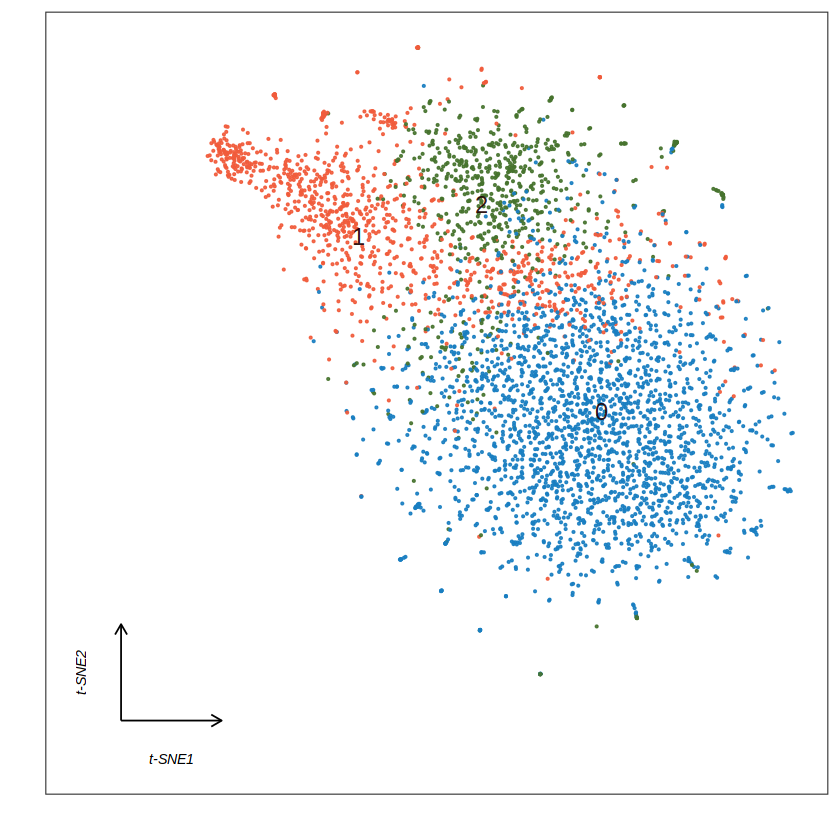

In [10]:
# tsne

p = clusterCornerAxes(
    object = dat, reduction = "tsne", cellLabel = T, pSize = 0.5,cellLabelSize=5,cellLabelColor = '#1d0101e5',
    noSplit = T, arrowType = "open", themebg = "bwCorner",show.legend = FALSE
) +
    scale_color_manual(values = c("#197EC0E5","#F05C3BE5","#46732EE5"))
p

In [11]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.cluster.pdf",p, width = 4,height = 4)

In [14]:
pathway1 = read.table('/home/suyanchi/project/dab/results/case/out/BI1.csv', sep = ',', header = T, row.names = 1)
pathway2 = read.table('/home/suyanchi/project/dab/results/case/out/BI2.csv', sep = ',', header = T, row.names = 1)
pathway3 = read.table("/home/suyanchi/project/dab/results/case/out/BI3.csv", sep = ",", header = T, row.names = 1)

In [16]:
setdiff(rownames(pathway1), union(rownames(pathway2), rownames(pathway3)))

[1] "BIOCARTA_SET_PATHWAY"            "BIOCARTA_MAL_PATHWAY"           
 [3] "BIOCARTA_RHO_PATHWAY"            "BIOCARTA_CASPASE_PATHWAY"       
 [5] "BIOCARTA_BIOPEPTIDES_PATHWAY"    "BIOCARTA_ACTINY_PATHWAY"        
 [7] "BIOCARTA_PGC1A_PATHWAY"          "BIOCARTA_BARRESTIN_SRC_PATHWAY" 
 [9] "BIOCARTA_NDKDYNAMIN_PATHWAY"     "BIOCARTA_CALCINEURIN_PATHWAY"   
[11] "BIOCARTA_MEF2D_PATHWAY"          "BIOCARTA_CCR3_PATHWAY"          
[13] "BIOCARTA_MPR_PATHWAY"            "BIOCARTA_NOS1_PATHWAY"          
[15] "BIOCARTA_NO1_PATHWAY"            "BIOCARTA_DNAFRAGMENT_PATHWAY"   
[17] "BIOCARTA_AKAP13_PATHWAY"         "BIOCARTA_VITCB_PATHWAY"         
[19] "BIOCARTA_HSWI_SNF_PATHWAY"       "BIOCARTA_CDK5_PATHWAY"          
[21] "BIOCARTA_P27_PATHWAY"            "BIOCARTA_AKAPCENTROSOME_PATHWAY"
[23] "BIOCARTA_BARR_MAPK_PATHWAY"      "BIOCARTA_ERYTH_PATHWAY"         
[25] "BIOCARTA_SPRY_PATHWAY"           "BIOCARTA_CHEMICAL_PATHWAY"      
[27] "BIOCARTA_MTA3_PATHWAY"           "BIOCARTA_LIS1_PATHWAY"          
[29] "BIOCARTA_PROTEASOME_PATHWAY"     "BIOCARTA_CERAMIDE_PATHWAY"      
[31] "BIOCARTA_EICOSANOID_PATHWAY"     "BIOCARTA_PTDINS_PATHWAY"        
[33] "BIOCARTA_P38MAPK_PATHWAY"

In [17]:
setdiff(rownames(pathway2), union(rownames(pathway1), rownames(pathway3)))

[1] "BIOCARTA_CD40_PATHWAY"      "BIOCARTA_TNFR2_PATHWAY"    
 [3] "BIOCARTA_NGF_PATHWAY"       "BIOCARTA_IGF1_PATHWAY"     
 [5] "BIOCARTA_INSULIN_PATHWAY"   "BIOCARTA_GLEEVEC_PATHWAY"  
 [7] "BIOCARTA_TPO_PATHWAY"       "BIOCARTA_TOLL_PATHWAY"     
 [9] "BIOCARTA_EGF_PATHWAY"       "BIOCARTA_PDGF_PATHWAY"     
[11] "BIOCARTA_DREAM_PATHWAY"     "BIOCARTA_PCAF_PATHWAY"     
[13] "BIOCARTA_RANKL_PATHWAY"     "BIOCARTA_ETS_PATHWAY"      
[15] "BIOCARTA_41BB_PATHWAY"      "BIOCARTA_EPO_PATHWAY"      
[17] "BIOCARTA_ATM_PATHWAY"       "BIOCARTA_IL6_PATHWAY"      
[19] "BIOCARTA_NFKB_PATHWAY"      "BIOCARTA_AKT_PATHWAY"      
[21] "BIOCARTA_IL2_PATHWAY"       "BIOCARTA_NTHI_PATHWAY"     
[23] "BIOCARTA_STRESS_PATHWAY"    "BIOCARTA_IL1R_PATHWAY"     
[25] "BIOCARTA_RNA_PATHWAY"       "BIOCARTA_BTG2_PATHWAY"     
[27] "BIOCARTA_EPONFKB_PATHWAY"   "BIOCARTA_ACH_PATHWAY"      
[29] "BIOCARTA_TRKA_PATHWAY"      "BIOCARTA_IL3_PATHWAY"      
[31] "BIOCARTA_LONGEVITY_PATHWAY" "BIOCARTA_RELA_PATHWAY"     
[33] "BIOCARTA_IL7_PATHWAY"       "BIOCARTA_IGF1MTOR_PATHWAY" 
[35] "BIOCARTA_TID_PATHWAY"       "BIOCARTA_GSK3_PATHWAY"     
[37] "BIOCARTA_MTOR_PATHWAY"      "BIOCARTA_CTCF_PATHWAY"     
[39] "BIOCARTA_VEGF_PATHWAY"      "BIOCARTA_DEATH_PATHWAY"

In [18]:
setdiff(rownames(pathway3), union(rownames(pathway1), rownames(pathway2)))

character(0)

In [89]:
pw = c('BIOCARTA_BARRESTIN_SRC_PATHWAY', 'BIOCARTA_CDK5_PATHWAY', 
       'BIOCARTA_NFKB_PATHWAY', 'BIOCARTA_AKT_PATHWAY', 'BIOCARTA_ACH_PATHWAY',
       'BIOCARTA_INFLAM_PATHWAY')

diff.Biocarta = data.frame(Biocarta=c(rep(pw, 3)),
                           Sample = c(rep('BI1', 6), rep('BI2', 6), rep('BI3', 6)))

pvalue = c(pathway1[pw, 'pvalue'], pathway2[pw, 'pvalue'], pathway3[pw, 'pvalue'])
pvalue[which(is.na(pvalue))]=1
pvalue

diff.Biocarta$pvalue = pvalue
write.table(diff.Biocarta, file = '/home/suyanchi/project/dab/results/case/out/all_1.csv', sep = ',', col.names = NA)

[1] 0.045867571 0.237334611 1.000000000 1.000000000 1.000000000 1.000000000
 [7] 1.000000000 1.000000000 0.042356673 0.046145576 0.201830445 0.075832032
[13] 1.000000000 1.000000000 1.000000000 1.000000000 1.000000000 0.007057415

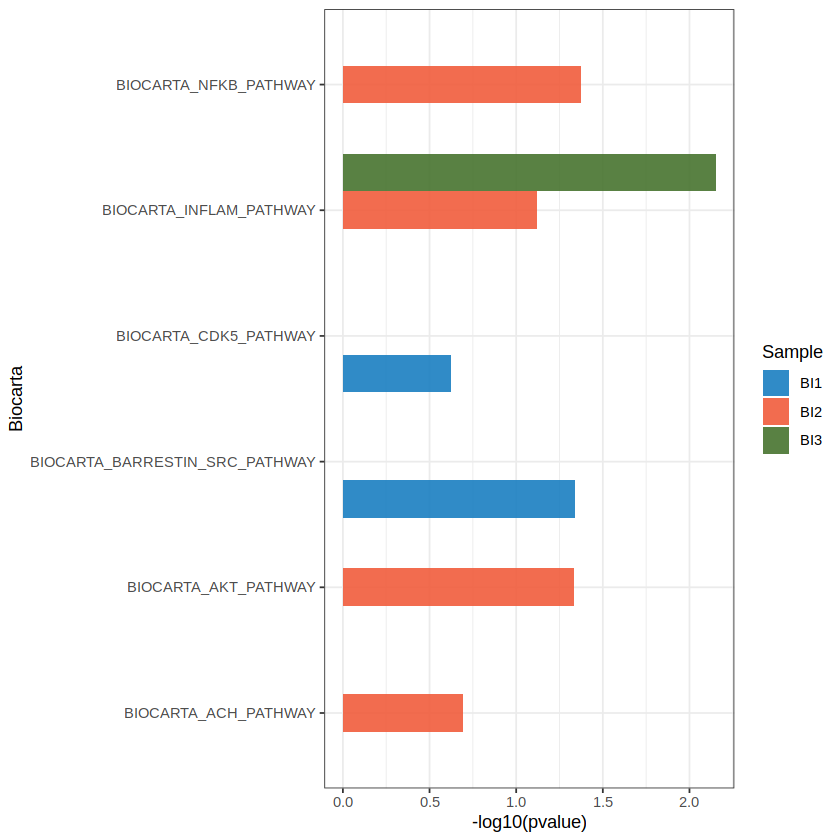

In [91]:
p.bioc <- ggplot(data = diff.Biocarta, aes(x=-log10(pvalue), y=Biocarta, fill=Sample)) +
  geom_bar(position = "dodge", stat = "identity") +
  theme_bw() +
  scale_fill_manual(values = c("#197EC0E5","#F05C3BE5","#46732EE5"))
p.bioc

In [92]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.diff.pathway.Biocarta.pdf",p.bioc,width = 5,height = 4)